In [ ]:
import umap
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


from src.eval.eval import EvalClusteringMetrics
from src.utils.embeddings_reader import EmbeddingReaderTXT

In [17]:
def resize_embedding(embeddings, dim):
    reducer = umap.UMAP(n_components=dim, random_state=2023)
    umap_emb = reducer.fit_transform(embeddings)
    return umap_emb


def clusters_str_to_id(dataframe):
    clusters_names = dataframe['cluster_id'].unique()
    _mapping = {}

    for i, cluster_name in enumerate(clusters_names):
        _mapping[cluster_name] = i

    dataframe['cluster_number'] = dataframe['cluster_id'].map(_mapping)
    return dataframe


def get_labels(image_names):
    
    data = pd.read_csv('../data/processed/test-task/clusters.csv', index_col=0)
    data = clusters_str_to_id(data)    
    y_true = []
    for image_name in image_names:
        y_true.append(data[data['file_name'] == image_name]['cluster_number'].values[0])
    return y_true


def get_predictions(embeddings):
    y_pred = KMeans(n_clusters=25, n_init='auto').fit_predict(embeddings)
    return y_pred


def visualize(y_pred, y_true, resized_embeddings):
    
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(resized_embeddings[:, 0], resized_embeddings[:, 1], c=y_pred, cmap='Paired')
    plt.title('Predicted labels')
    
    plt.subplot(1, 2, 2)
    plt.scatter(resized_embeddings[:, 0], resized_embeddings[:, 1], c=y_true, cmap='Paired')
    plt.title('True labels')
    
    plt.show()
    
    
def demo():

    eval_metrics = EvalClusteringMetrics(
        metrics={
            "Rand_score": metrics.rand_score,
            "Homogeneity score": metrics.homogeneity_score,
            "Completeness score": metrics.completeness_score,
            "V-Measure score": metrics.v_measure_score
        }
    )

    embeddings = EmbeddingReaderTXT(txt_path='../data/processed/test-task/embeddings.txt').read()
    image_names = list(embeddings.keys())
    embeddings = np.array(list(embeddings[image_name] for image_name in image_names))
    
    y_pred = get_predictions(embeddings)
    y_true = get_labels(image_names)
    eval_metrics.compute_metrics(y_true, y_pred)
    
    resized_embeddings = resize_embedding(embeddings=embeddings, dim=2)
    visualize(y_true, y_pred, resized_embeddings)
    

For visualization embeddings was projected into 2d space via umap algorithm

Rand_score: 0.9808108895421201
Homogeneity score: 0.8935283741909678
Completeness score: 0.8977467238306406
V-Measure score: 0.8956325820256376


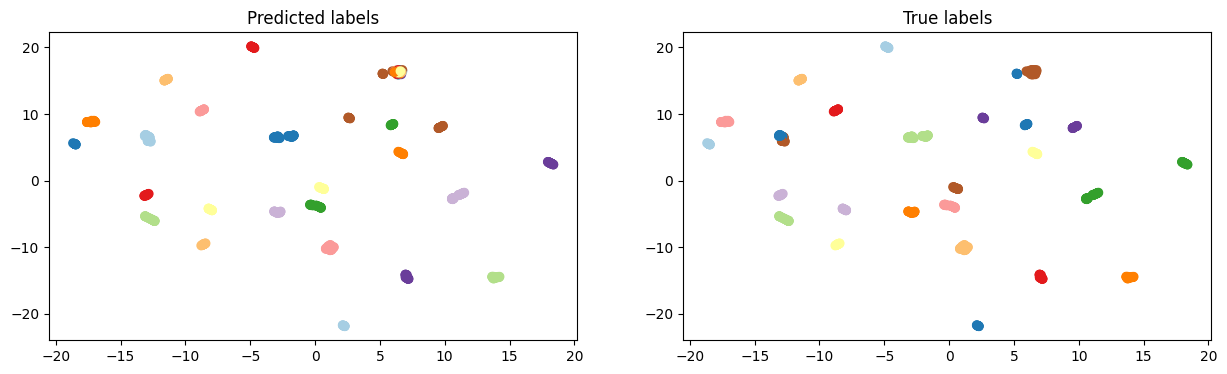

In [18]:
demo()